In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
from numpy.random import normal as normal
%matplotlib notebook 


## Initial functions

In [11]:

def lj_potential(r):
    '''
    Function that defines the Lenard-Jones potential as a function of r. Takes as an input the 
    distance of the particles, and returns the LJ potential.
    '''
    return 4*(r**-12 - r**-6)


##########################################
#Force due to Lennard-Jones potential
##########################################
def ljp_force(r):

    '''
    This function defines the gradient of the Lenard-Jones potential. 
    It includes the euclidean distance term that this potential has to be divided with, 
    to avoid the division in the force calculation. Takes as an input the 
    distance of the particles, and returns the derivative of the LJ potential.
    '''
    return 24*(2*r**-14 - r**-8)
    


##########################################
#Computation of the forces
##########################################
def forces(n):
    '''
    The function computes forces on each particle at time step n, by using 
    the Lenard-Jones potential defined in the previous functions. Has a double for loop 
    to account for all the particle interactions, and an if statement to avoid double counting. 
    PBC allows for an approximation of an infinitely sized system by simulating a 
    simple unit cell. The distance of the particles contain the modulo operator in order to take
    into account the PBC. 
    ''' 
    for i in range(num):
        for j in range(num):
            if i!=j:
                rij = (r[n,i] - r[n,j] + box_size/2) % box_size - box_size/2 #Distance between two particles 
                rij_abs = np.linalg.norm(rij)  #finding euclidean distance between two particles
                f[n,i] += ljp_force(rij_abs)*rij #Compute the corresponding forces

                
##########################################
#Kinetic Energy computation
##########################################   
def KineticEnergy(n,velocities):
    '''
    This function calculates the sum of the kinetic energy for every timestep, 
    using the corresponding velocities for each particle at the specific 
    snapshot.
    '''
    kin_energy[n] = 0.5*np.sum(velocities**2)
    return kin_energy


##########################################
#Potential Energy computation
########################################## 
def PotentialEnergy(n):
    '''
    Potential energy calculation based of the Lenard-Jones potential. Same as the 
    kinetic energy, this calculates the sum of the potential energy at the 
    specific snapshot.
    '''
    for i in range(num):
        for j in range(num):
            if i!=j:
                rij = (r[n,i] - r[n,j] + box_size/2) % box_size - box_size/2 
                rij_abs = np.linalg.norm(rij) #finding euclidean distance between two particles
                e[n] += lj_potential(rij_abs) #Evaluating potential energy


########################################## 
#Lambda factor for velocities
########################################## 
def lam_param(velocities,Temp):
    '''
    Lambda parameter for the velocities. Takes as inputs the Temperature and the 
    velocities for the current step, and gives as an output the lambda parameter.
    '''
    return np.sqrt(((num-1)*3*Temp)/np.sum(np.square(velocities)))

    
##########################################
#Make the animation
##########################################  
def update(i, x, y, z):
    '''
    Function that gives the animated simulation. Contains the x, y, z values for each 
    particle at every snapshot.
    '''
    sct.set_data(x[i], y[i])
    sct.set_3d_properties(z[i])


###########################
#Pressure factor function  
###########################
def Pressure_factor(n):
    '''
    Function for the calculation fot the factor that is inside the brackets in the pressure 
    function. We determine this factor first and then after the main loop of the simulation 
    we perform an average of the facctor in order to estimate the pressure of the system.
    Again this function takes as an input only the number of the snapshot.
    '''
    for i in range(num):
        for j in range(num):
            if i<j:
                rij = (r[n,i] - r[n,j] + box_size/2) % box_size - box_size/2
                rij_abs = np.linalg.norm(rij)
                P_factor[n] += (24*(-2*rij_abs**-13 + rij_abs**-7))*rij_abs




def pair_dist(n,bin_size):
    n_number=[0. for i in range(int(box_size/bin_size))]
    for i in range(num):
        for j in range(num):
            if i<j:
                rij = (r[n,i] - r[n,j] + box_size/2) % box_size - box_size/2
                rij_abs = np.linalg.norm(rij)
                n_number[int(rij_abs/bin_size)]+=1
    return n_number
    

## Main Simulation

--------------------------------------------------
This is a simulation for Argon atoms in Liquid state
--------------------------------------------------
The temperature of the system is:  1.0
The density of the system is:  0.8
The volume of the box is:  134.99999999999994
The box size of the system is:  5.12992784003009


<IPython.core.display.Javascript object>


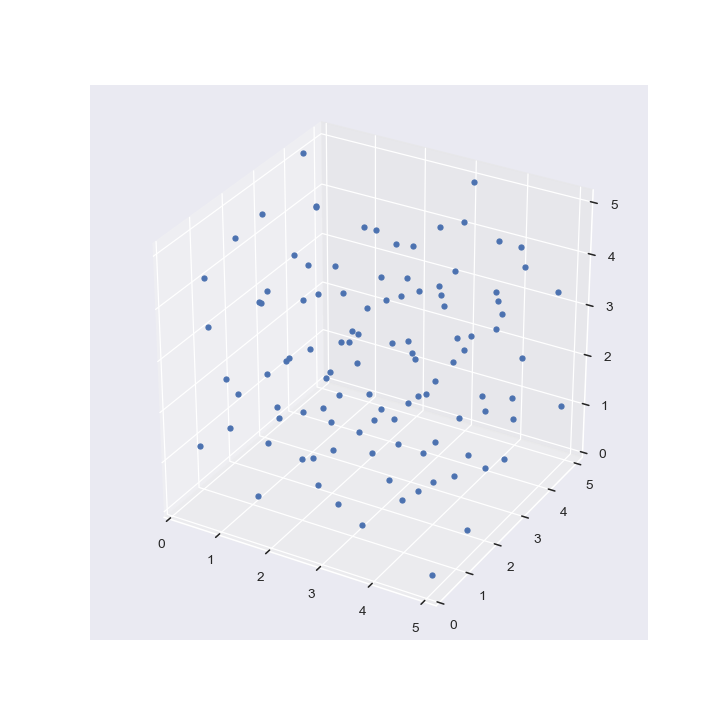

The pressure of the system is:  1.1
The mean temperature of simulated system is:  1.0


In [12]:
##########################################
#Parameters of the problem
##########################################
State_set = 2 #1:Gas, 2:Liquid, 3:Solid
cor_func_factor = 2 #1:Gas, 2:Liquid, 3:Solid



num = 108 # Number of particles
T = 10 #s 
coordinates_length = 3 #Dimentions
bin_size = 0.1
h = 0.005 #Timestep
N = int(T / h) #Number of snapshots
Temperatures = [3.0,1.0,0.5] #Used temperatures of the three systems
density = [0.3,0.8,1.2] #Densities of the three systems

if State_set==1:
    print('--------------------------------------------------')
    print("This is a simulation for Argon atoms in Gas state")
    print('--------------------------------------------------')
    rho = density[0] #Chosen density for the current system
    Temp = Temperatures[0] #Chosen themperature for the current system
elif State_set==2:
    print('--------------------------------------------------')
    print("This is a simulation for Argon atoms in Liquid state")
    print('--------------------------------------------------')
    rho = density[1] #Chosen density for the current system
    Temp = Temperatures[1] #Chosen themperature for the current system
else:
    print('--------------------------------------------------')
    print("This is a simulation for Argon atoms in Solid state")
    print('--------------------------------------------------')
    rho = density[2] #Chosen density for the current system
    Temp = Temperatures[2] #Chosen themperature for the current system
    
    
box_size = (num/rho)**(1/3) #Size of the box
volume = box_size**coordinates_length
print("The temperature of the system is: ", Temp)
print("The density of the system is: ", rho)
print("The volume of the box is: ", volume)
print("The box size of the system is: ", box_size)


########################################################
#Setting the initial conditions and style for the plot
########################################################
sns.set(style = "darkgrid")
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

##################################################################################################################
#Allocating arrays for 2D problem: first axis - time. second axis - particle's number. third - coordinate
##################################################################################################################
v = np.zeros((N+1, num, coordinates_length))
r = np.zeros((N+1, num, coordinates_length))
f = np.zeros((N+1, num, coordinates_length))
P_factor = np.zeros(N)
e = np.zeros(N)
kin_energy = np.zeros(N)
Temp_tot = np.zeros(N)

##########################################################################
#Initial conditions for our number of particles using FCC crystalization
##########################################################################
x1 = np.array([[0.0 , 0.0 , 0.0],
               [0.5 , 0.5 , 0.0],
               [0.0 , 0.5 , 0.5],
               [0.5 , 0.0 , 0.5]])
list = []
for i in range(coordinates_length):
    for j in range(coordinates_length):
        for k in range(coordinates_length):
            for m in range(4):
                base_positions = np.array([i, j, k])
                a = np.array((box_size*(x1[m] + base_positions)/3))
                list.append(a.tolist())

r[0] = np.array(list)
v[0] = np.random.normal(loc=0.0,scale=np.sqrt(Temp),size=(num,3))
v[0] = v[0]*lam_param(v[0],Temp)

###################
#Run dynamics
###################
forces(0) #Initial forces for the first snapshot

for n in range(N):
    '''
    Here we run the dynamics of the system. First we run the forces function for the first step,
    to compute the force for step 0 (because we know the initial conditions of the system), and
    then we calculate the positions of all particles based on this force. After the position 
    computation, the new force for the current step is computed, and using the two forces
    we compute the new velocities, based on the Verlet algorithm. Then after 
    the position, and velocity computation, we compute the kinetic, and the potential energy 
    of the system at each snapshot.
    '''
    PotentialEnergy(n)
    KineticEnergy(n,v[n])
    
    r[n+1] = r[n] + v[n]*h + 0.5*f[n]*h**2 #Current distances
    forces(n+1) #Current force of the system 
    
    if n in range(20,40):
        v[n+1] = v[n] + 0.5*h*(f[n]+f[n+1])
        v[n+1] = v[n+1]*lam_param(v[n+1],Temp)
        Temp_tot[n] = (2*kin_energy[n])/(3*(num-1))
        n_factor = pair_dist(n,bin_size)
        np.savetxt('solid'+'1'+'.csv',n_factor, delimiter=',')
    else:
        v[n+1] = v[n] + 0.5*h*(f[n]+f[n+1])
        Temp_tot[n] = (2*kin_energy[n])/(3*(num-1))

    if n in range(100,2000):
        Pressure_factor(n)
        
    
    '''
    Box rescale in order for the particles that leave the box_size to return 
    again inside from the oposite side.
    '''

    r[n+1].T[0] = np.where(np.abs(r[n+1].T[0]) < box_size, r[n+1].T[0] , r[n+1].T[0] % box_size) 
    r[n+1].T[0] = np.where(r[n+1].T[0] > 0 , r[n+1].T[0] , r[n+1].T[0] + box_size)
    r[n+1].T[1] = np.where(np.abs(r[n+1].T[1]) < box_size, r[n+1].T[1] , r[n+1].T[1] % box_size)
    r[n+1].T[1] = np.where(r[n+1].T[1] > 0 , r[n+1].T[1] , r[n+1].T[1] + box_size)
    r[n+1].T[2] = np.where(np.abs(r[n+1].T[2]) < box_size , r[n+1].T[2] , r[n+1].T[2] % box_size)
    r[n+1].T[2] = np.where(r[n+1].T[2] > 0 , r[n+1].T[2] , r[n+1].T[2] + box_size)

  
    
#####################
#Presure computation
#####################
Avg_pressure_factor = np.mean(P_factor)
Pressure = Temp*rho*(1-Avg_pressure_factor/(6*num*Temp))
print('The pressure of the system is: ', np.round(Pressure,2))
print('The mean temperature of simulated system is: ',np.round(np.mean(Temp_tot),2))

    
####################
#Animating
####################
sct, = ax.plot([], [], [], "o", markersize=4)
ax.set_xlim(0,box_size)
ax.set_ylim(0,box_size)
ax.set_zlim(0,box_size)
ani = animation.FuncAnimation(fig, update, N, fargs=(r[:,:,0], r[:,:,1],r[:,:,2]), interval=10)


# # # fn = 'MD_simulation'
# # ani.save(fn+'.gif',writer='imagemagick',fps= 1//h)

# Pair correlation function

----------------------------------------------------------
This is the pair correlation function of the Liquid state
----------------------------------------------------------


<IPython.core.display.Javascript object>


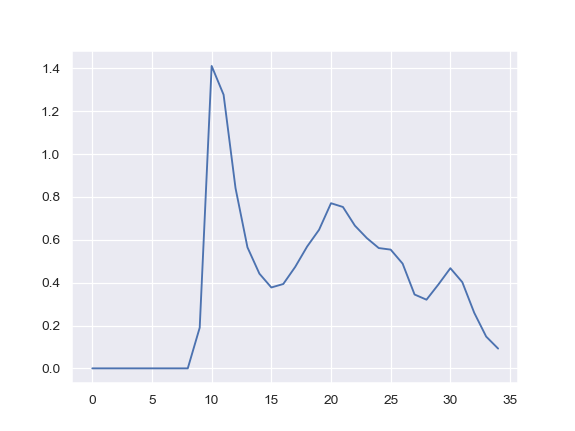

<function matplotlib.pyplot.show(*args, **kw)>

In [13]:

if cor_func_factor == 1:
    print('----------------------------------------------------------')
    print('This is the pair correlation function of the Gas state')
    print('----------------------------------------------------------')
    cor_func_factor_bin = 71
    fdf1 = np.loadtxt('numb_dens1.csv', delimiter=',')
    fdf2 = np.loadtxt('numb_dens2.csv', delimiter=',')
    fdf3 = np.loadtxt('numb_dens3.csv', delimiter=',')
    fdf4 = np.loadtxt('numb_dens4.csv', delimiter=',')
    fdf5 = np.loadtxt('numb_dens5.csv', delimiter=',')
    
    mean_value = (fdf1 + fdf2 + fdf3 + fdf4 + fdf5)/5

    
elif cor_func_factor == 2:
    print('----------------------------------------------------------')
    print('This is the pair correlation function of the Liquid state')
    print('----------------------------------------------------------')
    cor_func_factor_bin = 44
    fdf1 = np.loadtxt('liquid1.csv', delimiter=',')
    fdf2 = np.loadtxt('liquid2.csv', delimiter=',')
    fdf3 = np.loadtxt('liquid3.csv', delimiter=',')
    fdf4 = np.loadtxt('liquid4.csv', delimiter=',')
    fdf5 = np.loadtxt('liquid5.csv', delimiter=',')
    
    mean_value = (fdf1 + fdf2 + fdf3 + fdf4 + fdf5)/5
    
else:
    print('----------------------------------------------------------')
    print('This is the pair correlation function of the Solid state')
    print('----------------------------------------------------------')
    cor_func_factor_bin = 51
    fdf1 = np.loadtxt('solid1.csv', delimiter=',')
    fdf2 = np.loadtxt('solid2.csv', delimiter=',')
    fdf3 = np.loadtxt('solid3.csv', delimiter=',')
    fdf4 = np.loadtxt('solid4.csv', delimiter=',')
    fdf5 = np.loadtxt('solid5.csv', delimiter=',')
    
    mean_value = (fdf1 + fdf2 + fdf3 + fdf4 + fdf5)/5
    
############################################ 
#Plotting of the pair correlation function 
############################################
delta_r = box_size/cor_func_factor_bin
g = np.zeros(cor_func_factor_bin)
for i in range(cor_func_factor_bin):
    g[i] = ((2*volume)/(num*(num-1)*4*np.pi*delta_r*((i+1)*delta_r)**2))*mean_value[i]

fig = plt.figure()
plt.plot(g[:35])
plt.show

 # Pressures and errors for all states

In [14]:
######################
#Solid state pressure
######################

Solid_state_pressures = np.array([8.89,8.715226521113358,8.764807202709962,8.689247758282479,8.687466591847814])
Solid_state_std = np.round(np.std(Solid_state_pressures),3)
Solid_state_mean = np.round(np.mean(Solid_state_pressures),3)
print('---------------------------------------------------------------------------')
print('The mean pressure for the Solid state is:',Solid_state_mean)
print('The standard deviation for the Solid state pressure is:',Solid_state_std)
######################
#Liquid state pressure
######################

Liquid_state_pressures = np.array([0.83,0.9456867762576485,0.9073166814368712,1.0292557428402862,0.9056701906599788])
Liquid_state_std = np.round(np.std(Liquid_state_pressures),3)
Liquid_state_mean = np.round(np.mean(Liquid_state_pressures),3)
print('---------------------------------------------------------------------------')
print('The mean pressure for the Liquid state is:',Liquid_state_mean)
print('The standard deviation for the Liquid state pressure is:',Liquid_state_std)
######################
#Gas state pressure
######################

Gas_state_pressures = np.array([0.97,0.9749643600491167,0.9693355062609572,0.980442288403761,0.964353956476528])
Gas_state_std = np.round(np.std(Gas_state_pressures),3)
Gas_state_mean = np.round(np.mean(Gas_state_pressures),3)
print('---------------------------------------------------------------------------')
print('The mean pressure for the Gas state is:',Gas_state_mean)
print('The standard deviation for the Gas state pressure is:',Gas_state_std)
print('---------------------------------------------------------------------------')

---------------------------------------------------------------------------
The mean pressure for the Solid state is: 8.749
The standard deviation for the Solid state pressure is: 0.076
---------------------------------------------------------------------------
The mean pressure for the Liquid state is: 0.924
The standard deviation for the Liquid state pressure is: 0.065
---------------------------------------------------------------------------
The mean pressure for the Gas state is: 0.972
The standard deviation for the Gas state pressure is: 0.005
---------------------------------------------------------------------------


# FCC plot of the initial positions

<IPython.core.display.Javascript object>


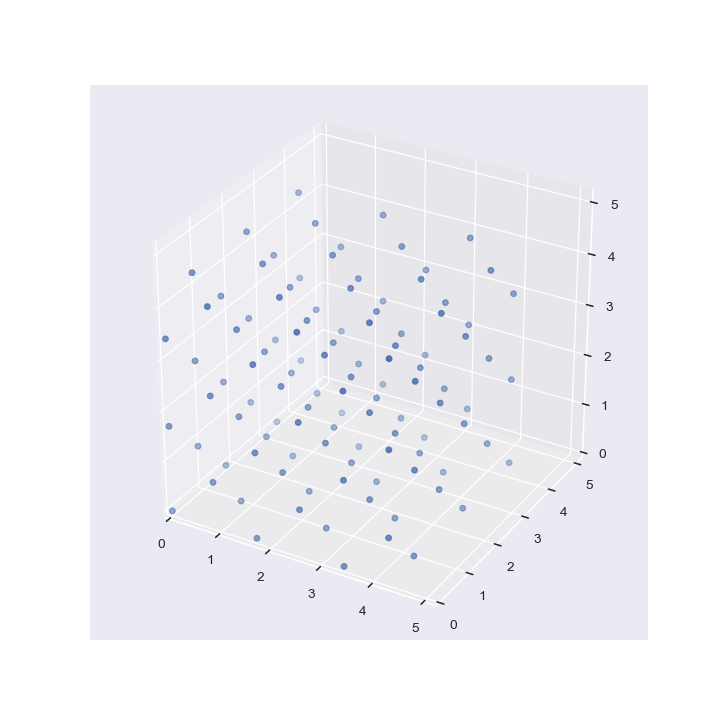

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(r[0].T[0], r[0].T[1], r[0].T[2])
ax.set_xlim(0,box_size)
ax.set_ylim(0,box_size)
ax.set_zlim(0,box_size)
plt.savefig('FCC.png')

# Temperature Figure 

<IPython.core.display.Javascript object>


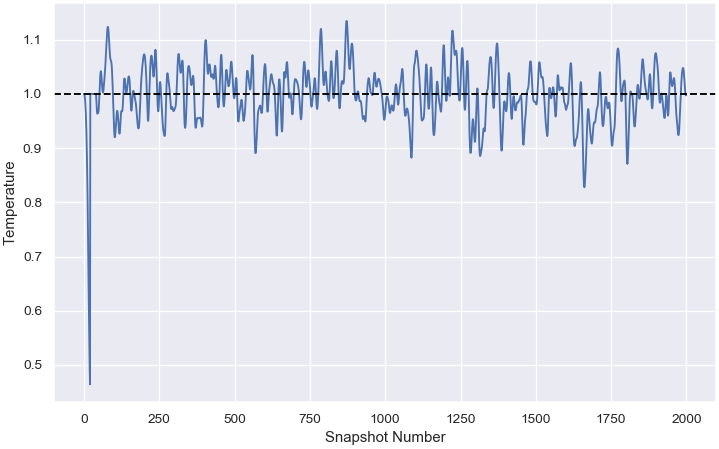

In [16]:
fig = plt.figure(figsize=(8, 5),constrained_layout=True)
plt.plot(Temp_tot)
plt.xlabel("Snapshot Number")
plt.ylabel("Temperature")
plt.axhline(y=Temp, color = 'black', ls = '--')
#plt.savefig('Temperature')
plt.show()

## Lennard-Jones potential 

<IPython.core.display.Javascript object>


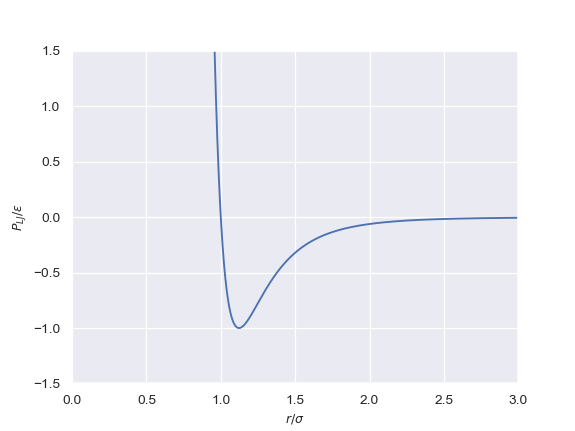

In [17]:
x = np.linspace(0.01,3.0,num=N)
p = lj_potential(x) #Lennard-Jones potential 

fig = plt.figure()
plt.plot(x,p)
plt.xlim([0.0,3.0])
plt.ylim([-1.5,1.5])
plt.ylabel(r"$P_{LJ}/\epsilon$",fontsize=10)
plt.xlabel(r"$r/\sigma$",fontsize=10)
#plt.savefig('Lennard-Jones Potential')
plt.show()

## Potential, Kinetic, and Total energy plots 

<IPython.core.display.Javascript object>


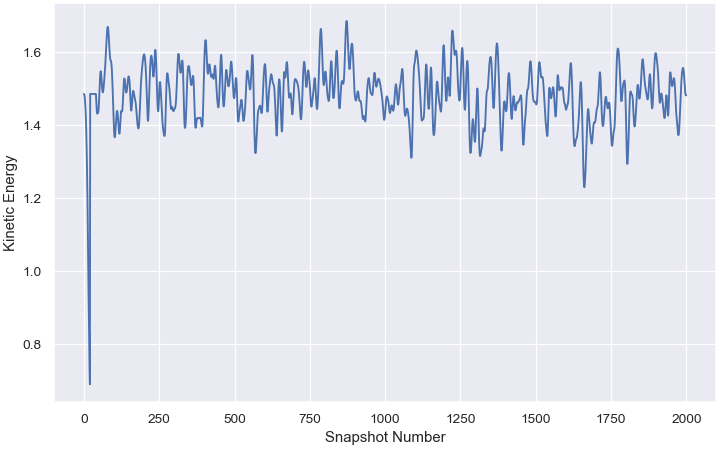

<IPython.core.display.Javascript object>


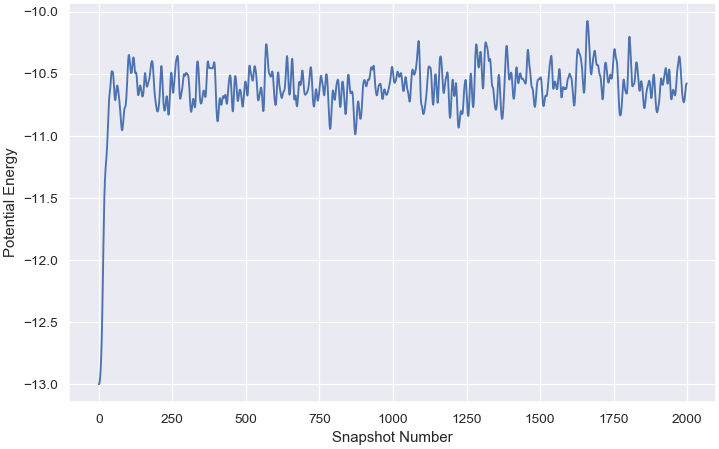

<IPython.core.display.Javascript object>


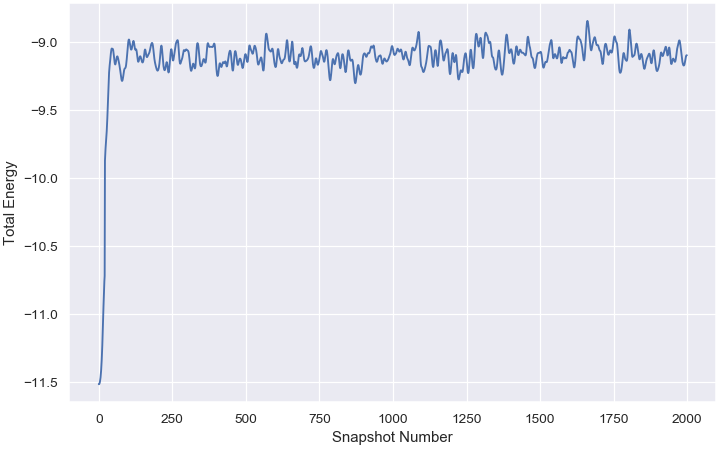

<IPython.core.display.Javascript object>


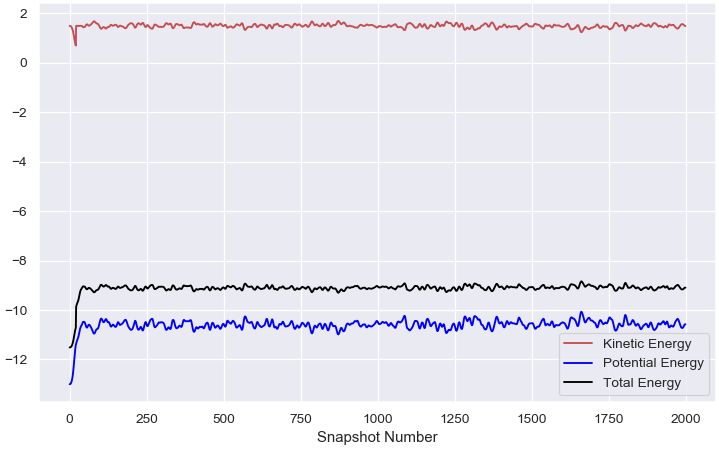

In [18]:
####################################
#Average values for the energies 
####################################
kinetic_energy_avg = kin_energy/num
potential_energy_avg = e/num
total_energy_avg = kinetic_energy_avg + potential_energy_avg


##########################
#Plots the kinetic energy 
##########################
fig = plt.figure(figsize=(8, 5),constrained_layout=True)
plt.plot(kinetic_energy_avg)
plt.xlabel("Snapshot Number")
plt.ylabel("Kinetic Energy")
#plt.savefig('Kinetic Energy')
plt.show()


##########################
#Plots the potential energy 
##########################
fig = plt.figure(figsize=(8, 5),constrained_layout=True)
plt.plot(potential_energy_avg)   
plt.xlabel("Snapshot Number")
plt.ylabel("Potential Energy")
#plt.savefig('Potential Energy')
plt.show()


##########################
#Plots the total energy 
##########################
fig = plt.figure(figsize=(8, 5),constrained_layout=True)
plt.plot(total_energy_avg)   
plt.xlabel("Snapshot Number")
plt.ylabel("Total Energy")
#plt.savefig('Total Energy')
plt.show()

###################################
#All the energies plotted together
################################### 
fig = plt.figure(figsize=(8, 5),constrained_layout=True)
plt.plot(kinetic_energy_avg,color = 'r',label = "Kinetic Energy")
plt.plot(potential_energy_avg,color = 'blue',label = "Potential Energy")
plt.plot(total_energy_avg,color = 'black',label = "Total Energy")
plt.xlabel("Snapshot Number")
#plt.savefig('Energies')
plt.legend()